## Tugas Week 1
Alifian Arief Rachmadinata (12217004)
Muhammad Rafki (12217084)

In [71]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

# Nomor 1

In [72]:
Data_Example1 = {'Qg':[1012,2248,3832,5480],
                'Pwf':[3317,3215,3020,2724]}
df = pd.DataFrame(Data_Example1,columns=['Qg','Pwf'])
df

,Qg,Pwf
0,1012,3317
1,2248,3215
2,3832,3020
3,5480,2724


In [73]:
Pr = 3360 #psia
def dpsqr(pwf):
    a = Pr**2 - pwf**2
    return(a)
def count_log10(a):
    from math import log10
    lg10 = []
    for i in range(0,len(a)):
        temp = log10(a[i])
        lg10.append(temp)
    return(lg10)

In [74]:
Dpsqr = dpsqr(np.asarray(df.Pwf))
df['Dpsqr']=pd.Series(Dpsqr)
df

,Qg,Pwf,Dpsqr
0,1012,3317,287111
1,2248,3215,953375
2,3832,3020,2169200
3,5480,2724,3869424


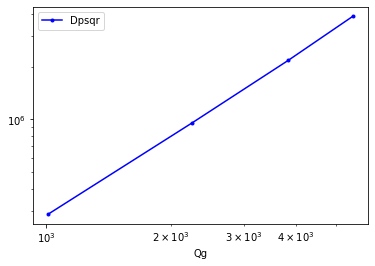

In [75]:
df.plot(kind='line',x='Qg',y='Dpsqr',color='blue',style='.-',loglog=True)

In [76]:
logDpsqr = count_log10(df.Dpsqr)
logQg = count_log10(df.Qg)
m,b = np.polyfit(logQg,logDpsqr,1)
n = 1/m
print('m =',m)
print('n =',n)

m = 1.5360791315644635
n = 0.6510081280653306


In [77]:
# Qg = C*(Pr**2-Pwf**2)**n
# Titik ke-tiga
C = (df.Qg[2]/(df.Dpsqr[2]**n))
print('C =',C)

C = 0.2873710148606728


In [78]:
# AOF
Patm = 14.65 #psia
AOF = C*dpsqr(Patm)**n
print('AOF =',AOF,' mscf/d')

AOF = 11214.725568531141  mscf/d


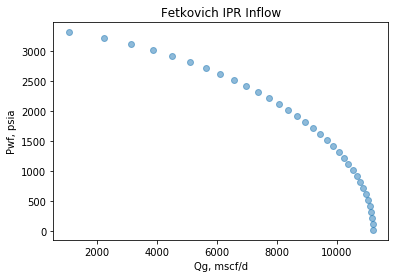

In [79]:
pwf = np.arange(14.65,3360,100)
qg = C*(dpsqr(pwf))**n
plt.scatter(qg,pwf,alpha=0.5)
plt.title('Fetkovich IPR Inflow')
plt.xlabel('Qg, mscf/d')
plt.ylabel('Pwf, psia')
plt.show()

# Nomor 2

In [80]:
#Initialize reservoir and fluid parameters
k = 150 #md
h = 100 #ft
PRg = 4000 #psi
Pwfg= 3600 #psi
Re = 2500 #ft
Rw = 0.33 #ft
Temp = 690 #R
Skin = 6 #Dimensionless
D = 4.3E-5 #Dimensionless
#PVT Table
GasPVT = {'PwfGasRange': [5000, 4000, 3897, 3500, 3000, 2500, 2000, 1500, 1000, 500, 14.7],
          'Zfact': [1.023, 0.9539, 0.9476, 0.9295, 0.9121, 0.9022, 0.9013, 0.9106, 0.9301, 0.9596, 0.9986],
          'GasVisc': [0.0275, 0.024, 0.0236, 0.022, 0.02, 0.0182, 0.0166, 0.0153, 0.0144, 0.0137, 0.0132],
          'GasBg': [0.004089, 0.004769, 0.004863, 0.005301, 0.006056, 0.007175,0.008946, 0.012034, 0.018424, 0.038039, 1.35459]
         }

In [81]:
df2 = pd.DataFrame(GasPVT,columns=['PwfGasRange','Zfact','GasVisc','GasBg'])
df2

,PwfGasRange,Zfact,GasVisc,GasBg
0,5000.0,1.0230,0.0275,0.004089
1,4000.0,0.9539,0.0240,0.004769
2,3897.0,0.9476,0.0236,0.004863
3,3500.0,0.9295,0.0220,0.005301
4,3000.0,0.9121,0.0200,0.006056
5,2500.0,0.9022,0.0182,0.007175
6,2000.0,0.9013,0.0166,0.008946
7,1500.0,0.9106,0.0153,0.012034
8,1000.0,0.9301,0.0144,0.018424
9,500.0,0.9596,0.0137,0.038039


> <h2>Quadratic Equation</h2>

<img src="https://petrowiki.org/images/f/fe/Vol4_page_0006_eq_004.png">

In [82]:
def a_ex2(miug,zfact):
    from math import log
    a1 = log(Re/Rw)-(3/4)+Skin
    a2 = 1422*Temp/(k*h)
    a = a1*a2*miug*zfact
    return(a)
def b_ex2(miug,zfact):
    b = 1422*miug*zfact*Temp*D/(k*h)
    return(b)
def qg_ex2(a,b,pwf):
    q = a**2+4*b*(PRg**2-pwf**2)
    qg = (-a+q**(1/2))/(2*b)
    return(qg)

In [83]:
a = a_ex2(df2.GasVisc,df2.Zfact)
b = b_ex2(df2.GasVisc,df2.Zfact)
qg = qg_ex2(df2.GasVisc,df2.Zfact,df2.PwfGasRange)

df2['a']=pd.Series(a)
df2['b']=pd.Series(b)
df2['Qg']=pd.Series(qg)
df2

,PwfGasRange,Zfact,GasVisc,GasBg,a,b,Qg
0,5000.0,1.0230,0.0275,0.004089,26.099064,0.000079,NaN
1,4000.0,0.9539,0.0240,0.004769,21.238835,0.000064,0.000000
2,3897.0,0.9476,0.0236,0.004863,20.746922,0.000063,926.469909
3,3500.0,0.9295,0.0220,0.005301,18.970933,0.000058,2008.576504
4,3000.0,0.9121,0.0200,0.006056,16.923456,0.000051,2770.295352
5,2500.0,0.9022,0.0182,0.007175,15.233189,0.000046,3287.377391
6,2000.0,0.9013,0.0166,0.008946,13.880147,0.000042,3648.840179
7,1500.0,0.9106,0.0153,0.012034,12.925153,0.000039,3885.854966
8,1000.0,0.9301,0.0144,0.018424,12.425353,0.000038,4015.873002
9,500.0,0.9596,0.0137,0.038039,12.196281,0.000037,4051.299908


In [84]:
df2n = df2.iloc[1:].reset_index(drop=True)

In [85]:
df2n

,PwfGasRange,Zfact,GasVisc,GasBg,a,b,Qg
0,4000.0,0.9539,0.0240,0.004769,21.238835,0.000064,0.000000
1,3897.0,0.9476,0.0236,0.004863,20.746922,0.000063,926.469909
2,3500.0,0.9295,0.0220,0.005301,18.970933,0.000058,2008.576504
3,3000.0,0.9121,0.0200,0.006056,16.923456,0.000051,2770.295352
4,2500.0,0.9022,0.0182,0.007175,15.233189,0.000046,3287.377391
5,2000.0,0.9013,0.0166,0.008946,13.880147,0.000042,3648.840179
6,1500.0,0.9106,0.0153,0.012034,12.925153,0.000039,3885.854966
7,1000.0,0.9301,0.0144,0.018424,12.425353,0.000038,4015.873002
8,500.0,0.9596,0.0137,0.038039,12.196281,0.000037,4051.299908
9,14.7,0.9986,0.0132,1.354590,12.228751,0.000037,4002.769304


In [86]:
def interpolate(x,y,on_x):
    m = (y[1]-y[0])/(x[1]-x[0])
    y1 = y[0]+m*(on_x-x[0])
    return(y1)

In [87]:
Qg_PRg20 = interpolate(np.asarray(df2n.PwfGasRange[7:9]),np.asarray(df2n.Qg[7:9]),800)
print('Pwf = 20% PRg, Qg =',Qg_PRg20,'mscf/d')

Pwf = 20% PRg, Qg = 4030.0437643357814 mscf/d


In [88]:
print('AOF =',df2n.Qg[9],' mscf/d')

AOF = 4002.769303917692  mscf/d


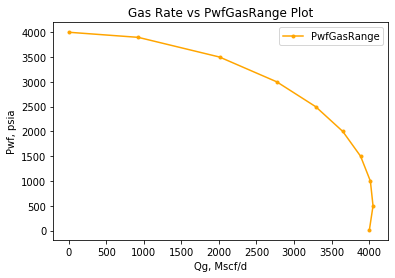

In [89]:
df2n.plot(kind='line',x='Qg',y='PwfGasRange',style='.-',color='orange')
plt.title('Gas Rate vs PwfGasRange Plot')
plt.xlabel('Qg, Mscf/d')
plt.ylabel('Pwf, psia')
plt.show()